<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data
   ## 1st and Second Models


## Problem Statement

Are inaccurate sales prices leading to unfair outcomes for homeowners looking to sell? This impacts multiple stakeholders such as homeowners pricing their homes too high, which makes their homes unsellable even in the best of markets.  Also, homeowners not getting enough return for their homes by listing the prices too low.  In other words if we can predict a price for a home with the appropriate linear regression model that outperforms a baseline model could we end up aiding homeowners in this situation. As a data scientist working for a real estate company, eliminating this pain point would also help real estate agents close more deal, get more commission, and more revenue from closing fees.

## Background/Outside Research

Whether you are in a good market or not, overconfidence can be an issue when selling your home. You have to put your home in a good position to sell well and that ultimately comes down to price.  While we know about the fundamentals about supply and demand and how that can tie-in to a seller's market, you do not want to overprice your home.  Per Trulia.com's article "8 reasons Your House Isn't Selling", Determining the best asking price is one of the most important aspects of selling a home. The bottom line is that if you list the price of the home way above market value, you will miss out on prospective buyers(trulia.com).  The other side of this coin is if a home owner is not utilizing their resources and ends up underpricing their homes, then you have someone that has not maximized the return on their investment. While their can be a myriad of painpoints for home selling, we can help address one of the main painpoints by helping create a linear model that can predict prices accurately. That can help owners and any other stakeholders that are part of this process such as real estate agents, and the company they represent.

As part of the methodology I also wanted to look at some of the features that are part of the home that buyers will pay extra for as a way to drive the feature engineering in the creation of this model. Features such as number of fireplaces, 40% of home buyers are willing to cough up an extra 1400 dollars for one(Weigley, S.,2013). This ties in to the feature in the data set 'FirePlaces' which indicates number of fireplaces in the home.  Another example of this is central air conditioning, "with nearly seven in 10 homeowners willing to pay extra"(Weigley, S., 2013). Of course what people are willing to pay for is different than what these features could actually contribute to the overall cost of a home.

<ul>
<li> Weigley, S.(2019). 11 home features buyers will pay extra for. Retrieved from [USA Today](https://www.usatoday.com/story/money/personalfinance/2013/04/28/24-7-home-features/2106203/). </li>
<li> Web Editor.(nd). 8 Reasons Your House Isn't Selling. Retrieved from [Trulia Blog](https://www.trulia.com/blog/how-to-sell-a-house-8-reasons/). </li>
</ul>

## Finding the right model

Part of finding the right model will involve a few factors, what is the R2 Score?  The R2 indicates how much of the variability in our target is explained by the features in our model. This can help us assess which regression model gives us the best predictions.

Interpreting coefficients can be explained as, for every 1 unit increase of a particular feature, we expect the target to increase by the coefficient amount. For those models that are not scaled, this can be a good way to see how the features contribute from a dollar amount to get insight into what contributes heavily to the sales price of these homes.

Another important aspect to consider is how a model performs in terms of bias-variance.  Typically when a model is high bias, this model is considered underfit. This indicates a model that is bad at predicting a target. Whether its data that it has trained on it or unseen data.  In this case we need to increase variance, and we can do that with complexity of the model, that is adding more features.
On the other hand a high variance model indicates a complicated model that does not do well generalizing to new data.  This can indicate that the model needs to be simplified. An overfit model does well on the data its trained on, but not on the unseen data. We can tackle this issue through regularization(ridge or lasso), or simplifying the model with less features.

Reference
Lesson 3.02 - Regression Metrics


## Import libraries and data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV

In [2]:
train_df=pd.read_csv('../datasets/train.csv')

## Data clean up!

In [3]:
pd.set_option('display.max_columns', 81)

In [4]:
#look at headers
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
#look at dataframe dimensions
train_df.shape

(2051, 81)

In [7]:
#Checking for nulls
train_df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train_df.isnull().mean().sort_values(ascending=False)

Pool QC         0.995612
Misc Feature    0.968308
Alley           0.931741
Fence           0.804973
Fireplace Qu    0.487567
                  ...   
Heating QC      0.000000
Central Air     0.000000
Electrical      0.000000
1st Flr SF      0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [9]:
#dropping columns with nulls close to and over 50% as well as some lower correlation columns as well.
train_df.drop(columns=['Pool QC', 'Misc Feature', 'Alley','Fence','Lot Frontage','Mas Vnr Area','Garage Yr Blt'], inplace=True)
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [10]:
train_df.shape

(2051, 74)

In [11]:
train_df.isnull().mean().sort_values(ascending=False)

Fireplace Qu     0.487567
Garage Finish    0.055583
Garage Qual      0.055583
Garage Cond      0.055583
Garage Type      0.055095
                   ...   
Foundation       0.000000
PID              0.000000
Heating QC       0.000000
Central Air      0.000000
SalePrice        0.000000
Length: 74, dtype: float64

In [12]:
pd.set_option('display.max_rows', 80)
#https://stackoverflow.com/questions/23168416/pandas-printing-all-dtypes

In [13]:
train_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
H

In [14]:
train_df.drop(columns=['Fireplace Qu'], inplace=True)
train_df.head()
#close to 50% Null decided to drop as well.

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [15]:
#renamed the columns with a more appropriate format
train_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)

train_df.head(1)
#week 2 breakfast hour:pandas Review

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500


In [16]:
#dropping rows with nulls
train_df.dropna(inplace=True)
train_df.shape

(1866, 73)

In [17]:
train_df[['year_built','year_remod/add','yr_sold']]=train_df[['year_built','year_remod/add','yr_sold']].apply(pd.to_datetime,format='%Y')

#https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime

In [18]:
train_df.rename(columns={'year_remod/add':'year_remod_add'}, inplace=True)

In [19]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010-01-01,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009-01-01,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010-01-01,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010-01-01,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010-01-01,WD,138500


In [20]:
sns.set_style('whitegrid')

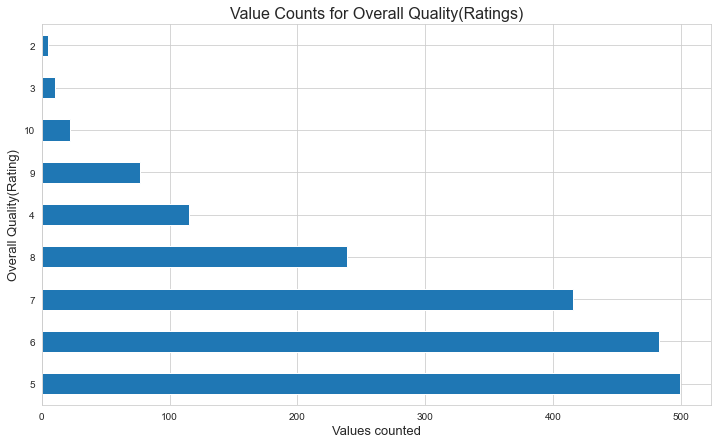

In [21]:
plt.figure(figsize = (12,7))
plt.title('Value Counts for Overall Quality(Ratings)', fontdict={'fontsize':16})
plt.ylabel('Overall Quality(Rating)',fontdict={'fontsize':13})
plt.xlabel('Values counted',fontdict={'fontsize':13})
train_df['overall_qual'].value_counts().plot(kind='barh');
plt.savefig('../images/overall_quality_value_cts.png')

We can see most of the houses are between a quality rating of 5 and 8.

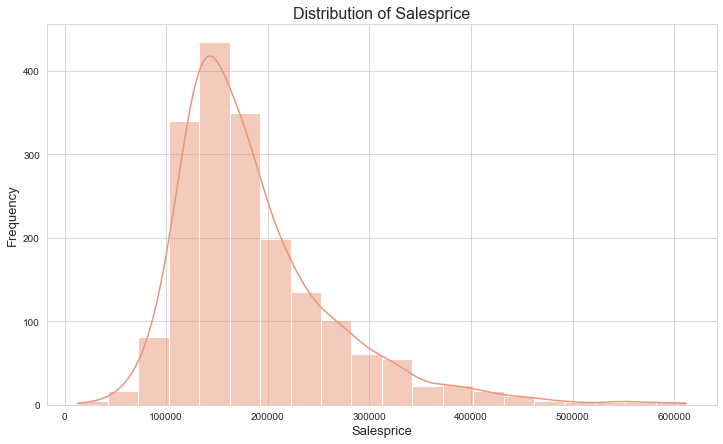

In [22]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Salesprice',fontdict={'fontsize':16})
plt.xlabel('Salesprice', fontdict={'fontsize':13})
plt.ylabel('Frequency', fontdict={'fontsize':13})
sns.histplot(data=train_df, x=train_df['saleprice'],kde=True, bins=20, color='darksalmon');
plt.savefig('../images/salesprice_distr.png')

Looks like most values in the data set are between 120,000 to a little under 280,000.  This is also a right-skewed distribution as the long tail extends to the right as most values are show on the left side(between 90,000 & 340,000). You can also see a value of 600,000 as an outlier as well. 

## EDA:Correlation & Heatmap

In [23]:
train_df.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.793771
gr_liv_area,0.707227
garage_cars,0.653573
garage_area,0.646123
1st_flr_sf,0.625741
total_bsmt_sf,0.624425
full_bath,0.551247
totrms_abvgrd,0.536018
fireplaces,0.444647


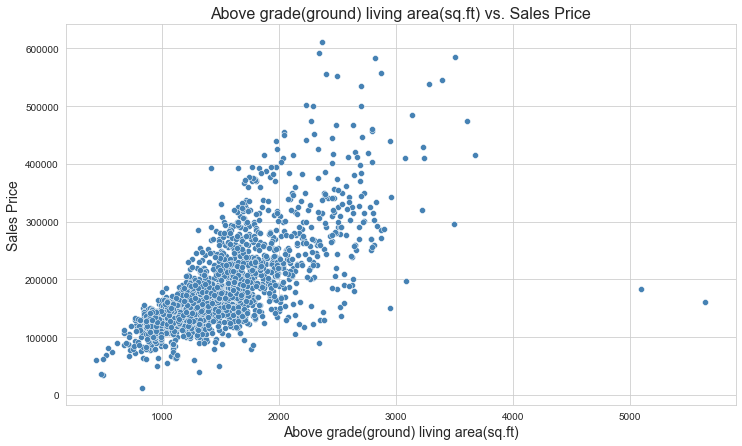

In [24]:
plt.figure(figsize = (12,7))
plt.title('Above grade(ground) living area(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Above grade(ground) living area(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train_df,x=train_df['gr_liv_area'], y=train_df['saleprice'],color='steelblue');
plt.savefig('../images/gr_liv_area_vs_sales.png')

This is a slighly higher than moderate linear relationship, it takes on the shape of a fan. Its correlation is .71.

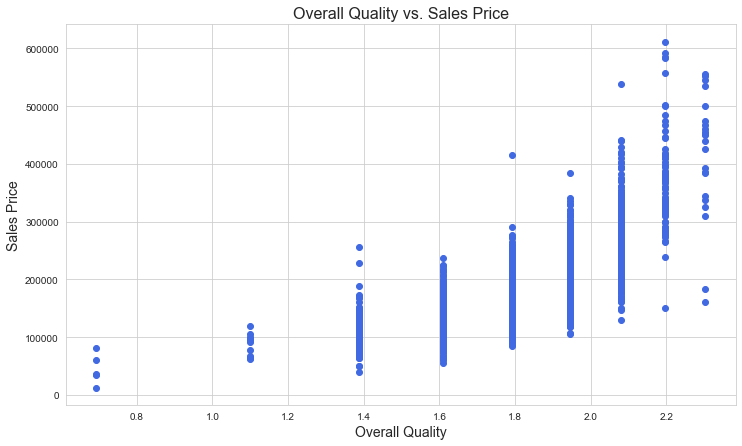

In [25]:
plt.figure(figsize=(12,7))
plt.title('Overall Quality vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Overall Quality', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
plt.scatter(np.log(train_df['overall_qual']),(train_df['saleprice']),color='royalblue');
plt.savefig('../images/overall_qual_vs_sales.png')

For categorical features such as overall quality, the logarithmic base can bend the scale such that we can see a relationship between overall_quality and sale price.  This actually has a higher correlation than the previous example at .79.

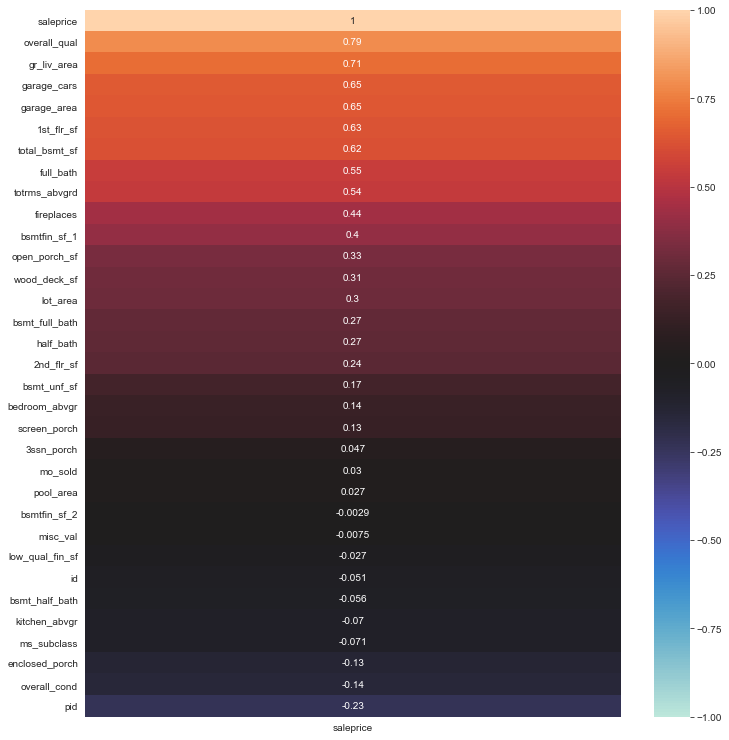

In [26]:
plt.figure(figsize=(12,13))
sns.heatmap(train_df.corr()[['saleprice']].sort_values(by='saleprice',
                                                       ascending=False),
            cmap='icefire', 
            annot=True, vmin=-1, vmax=1);
#2.02 eda lesson

This heatmap gives us a good look at the features with the highest correlation.
Such as overall_qual:.81, gr_liv_area at .71.  Some of the features with no effect whatsoever are 3ssn_porch at .037 and the mo_sold at .026.

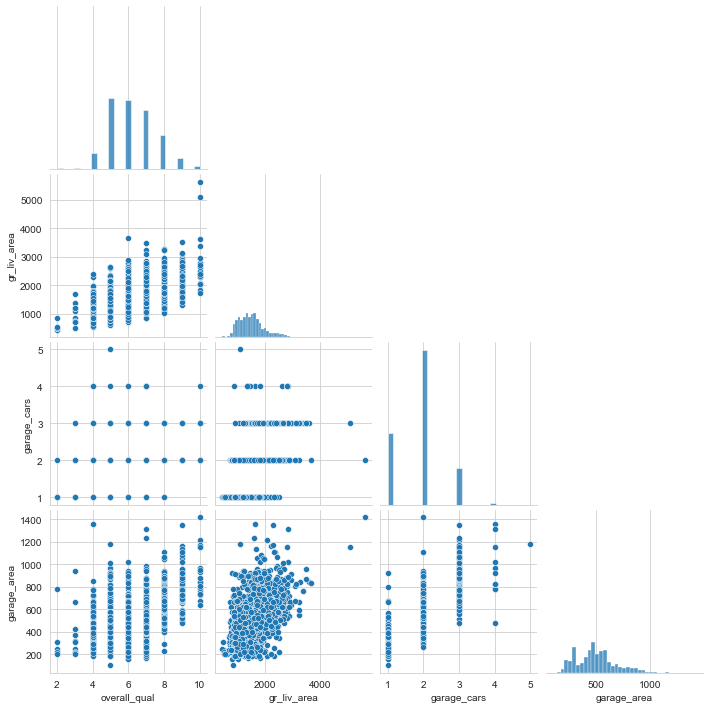

In [27]:
#pairplot of features with highest correlation.
sns.pairplot(train_df[['overall_qual','gr_liv_area','garage_cars','garage_area']], corner=True);

A broader look at some of the top features, categorical values will be harder to gauge visually correlation wise.  Thankfully we have the heatmap for that.

## Feature Engineering

In [28]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010-01-01,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009-01-01,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010-01-01,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010-01-01,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010-01-01,WD,138500


In [29]:
train_df['paved_drive'].value_counts()

Y    1744
N      88
P      34
Name: paved_drive, dtype: int64

In [30]:
#turn them into paved drive and central air as binary categories
train_df['paved_drive']=train_df['paved_drive'].apply(lambda x:1 if x=='Y' else 0)
#3.06 lesson model walkthrough

In [31]:
train_df['paved_drive'].value_counts()

1    1744
0     122
Name: paved_drive, dtype: int64

In [32]:
train_df['central_air'].value_counts()

Y    1783
N      83
Name: central_air, dtype: int64

In [33]:
#per article central air is one of the most important to home buyers.
train_df['central_air']=train_df['central_air'].apply(lambda x:1 if x=='Y' else 0)

In [34]:
#get dummies to see if zoning type helps the model.
train_df=pd.get_dummies(columns=['ms_zoning'], data=train_df, drop_first=True)
train_df.head()
#via lab 3.01 linear regression

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0


In [35]:
train_df=pd.get_dummies(columns=['house_style'], data=train_df, drop_first=True)
train_df

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,...,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,...,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0,0,0,0,0,1,0,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,...,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0,0,0,0,0,1,0,0
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,...,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0,0,1,0,0,0,0,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,...,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0,0,0,0,0,1,0,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,...,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,8,5,2007-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,1,SBrkr,1728,...,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Attchd,Fin,2.0,520.0,TA,TA,1,0,276,0,0,0,0,0,1,2008-01-01,WD,298751,0,0,1,0,0,1,0,0,0,0,0
2047,785,905377130,30,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,4,5,1940-01-01,1950-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,1,SBrkr,861,...,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,Detchd,Unf,2.0,539.0,TA,TA,1,158,0,0,0,0,0,0,3,2009-01-01,WD,82500,0,0,1,0,0,1,0,0,0,0,0
2048,916,909253010,50,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,6,6,1928-01-01,1950-01-01,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,1,SBrkr,1172,...,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,Detchd,Unf,2.0,342.0,Fa,Fa,1,0,0,0,0,0,0,0,3,2009-01-01,WD,177000,0,0,1,0,

In [36]:
train_df['overall_qual'].value_counts()

5     499
6     483
7     416
8     239
4     115
9      77
10     22
3      10
2       5
Name: overall_qual, dtype: int64

In [37]:
#built column where we see if its at least an 8 in quality if not 0
train_df['high_qual']=(train_df['overall_qual'] >= 8).astype(int)
train_df

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,...,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,...,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,...,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,...,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,...,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,...,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,8,5,2007-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,1,SBrkr,1728,...,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Attchd,Fin,2.0,520.0,TA,TA,1,0,276,0,0,0,0,0,1,2008-01-01,WD,298751,0,0,1,0,0,1,0,0,0,0,0,1
2047,785,905377130,30,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,4,5,1940-01-01,1950-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,1,SBrkr,861,...,0.0,0.0,1,0,1,1,TA,4,Typ,0,Detchd,Unf,2.0,539.0,TA,TA,1,158,0,0,0,0,0,0,3,2009-01-01,WD,82500,0,0,1,0,0,1,0,0,0,0,0,0
2048,916,909253010,50,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,6,6,1928-01-01,1950-01-01,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,1,SBrkr,1172,...,0.0,0.0,1,1,3,1,TA,9,Typ,1,Detchd,Unf,2.0,342.0,Fa,Fa,1,0,0,0,0,0,0,0,3,2009-01-01,WD,177000,0,0,1,0,0,0,0,0,0,0,0,0
2049,639,53

In [38]:
train_df[['gr_liv_area']].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       gr_liv_area
0            1479
1            2122
2            1057
3            1444
4            1445
...           ...
2046         1728
2047          861
2048         1913
2049         1200
2050         1804

[1866 rows x 1 columns]>

In [39]:
train_df['best_gr_liv_area']=(train_df['gr_liv_area'] >= 1502).astype(int)

In [40]:
train_df

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,...,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,...,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,...,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,...,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,...,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,...,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,8,5,2007-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,1,SBrkr,1728,...,0.0,2,0,3,1,Gd,7,Typ,1,Attchd,Fin,2.0,520.0,TA,TA,1,0,276,0,0,0,0,0,1,2008-01-01,WD,298751,0,0,1,0,0,1,0,0,0,0,0,1,1
2047,785,905377130,30,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,4,5,1940-01-01,1950-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,1,SBrkr,861,...,0.0,1,0,1,1,TA,4,Typ,0,Detchd,Unf,2.0,539.0,TA,TA,1,158,0,0,0,0,0,0,3,2009-01-01,WD,82500,0,0,1,0,0,1,0,0,0,0,0,0,0
2048,916,909253010,50,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,6,6,1928-01-01,1950-01-01,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,1,SBrkr,1172,...,0.0,1,1,3,1,TA,9,Typ,1,Detchd,Unf,2.0,342.0,Fa,Fa,1,0,0,0,0,0,0,0,3,2009-01-01,WD,177000,0,0,1,0,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,104

In [41]:
train_df.to_csv('../datasets/train_eda_engineered_1.csv', index=False)

## Model 1

### Model prep

In [42]:
train_df._get_numeric_data().columns

Index(['id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'central_air', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd',
       'fireplaces', 'garage_cars', 'garage_area', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'saleprice',
       'ms_zoning_FV', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl', 'high_qual', 'best_gr_liv_area'],
      dtype='object')

In [43]:
features=[col for col in train_df._get_numeric_data().columns if col != 'saleprice']
#Lesson Model workflow

X=train_df[features]
y=train_df['saleprice']
X.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
0,109,533352170,60,13517,6,8,533.0,0.0,192.0,725.0,1,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,1,0,44,0,0,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0
1,544,531379050,60,11492,7,5,637.0,0.0,276.0,913.0,1,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,1,0,74,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,0,0,0,1
2,153,535304180,20,7922,5,7,731.0,0.0,326.0,1057.0,1,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,1,0,52,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,318,916386060,60,9802,5,5,0.0,0.0,384.0,384.0,1,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,1,100,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,0,0,0,0
4,255,906425045,50,14235,6,8,0.0,0.0,676.0,676.0,1,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,0,59,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0


In [44]:
#Summary statistics of features we will use for this model. 
X.describe()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
count,1866.000000,1.866000e+03,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,1466.142015,7.065948e+08,55.948553,10135.571275,6.232583,5.589496,466.972133,51.656484,577.763666,1096.392283,0.955520,1176.304394,335.457128,4.105038,1515.866559,0.446409,0.065916,1.581994,0.384244,2.837621,1.024116,6.447481,0.628081,1.879957,501.367631,0.934620,99.079850,48.517685,21.470525,2.754019,17.705788,2.334941,53.766881,6.206324,0.049839,0.005895,0.792069,0.146302,0.004823,0.511790,0.002144,0.006967,0.297964,0.022508,0.049839,0.181136,0.456056
std,843.905860,1.883892e+08,41.620789,6835.394346,1.359123,1.063545,463.389810,171.261180,440.123340,418.395839,0.206215,394.063839,428.324724,45.505204,495.186332,0.519404,0.252486,0.544017,0.500668,0.786549,0.156905,1.517609,0.641667,0.652120,188.980879,0.247262,131.009013,65.656903,59.346616,26.131633,59.131060,37.433191,595.262334,2.735485,0.217671,0.076573,0.405936,0.353504,0.069300,0.499995,0.046262,0.083198,0.457486,0.148369,0.217671,0.385234,0.498199
min,1.000000,5.263011e+08,20.000000,1300.000000,2.000000,1.000000,0.000000,0.000000,0.000000,160.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,737.500000,5.284310e+08,20.000000,7564.250000,5.000000,5.000000,0.000000,0.000000,238.000000,819.000000,1.000000,889.000000,0.000000,0.000000,1151.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,364.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1471.000000,5.354021e+08,50.000000,9552.000000,6.000000,5.000000,405.500000,0.000000,480.000000,1028.500000,1.000000,1105.000000,0.000000,0.000000,1457.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,484.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2185.250000,9.071260e+08,70.000000,11645.000000,7.000000,6.000000,757.500000,0.000000,811.000000,1341.750000,1.000000,1421.500000,702.000000,0.000000,1735.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,585.750000,1.000000,170.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,5644.000000,147

### Train/test split

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=.7, random_state=42)

In [46]:
linreg=LinearRegression()

### Cross Validation

In [47]:
# Train cross-val
cross_val_score(linreg,X_train,y_train).mean()

0.8171519801256155

In [48]:
#Test cross-val
cross_val_score(linreg,X_test,y_test).mean()

0.6758705227816638

This allows us to establish what the baseline score($R^2$) is for the model based on just the mean, the scores of 81.71% and 67.59%. These numbers signify that the variance in our y(sale price) is explained by the X features in our model.  There is a drop in the test set as it does not do as good of a job generalizing to new data. 

### Model fitting & Evaluation

In [49]:
#Use train data to fit
linreg.fit(X_train,y_train)

LinearRegression()

In [50]:
#training score
linreg.score(X_train,y_train)

0.8628372670650073

In [51]:
#testing score
linreg.score(X_test,y_test)

0.7346371208606894

### Interpret coefficients

In [52]:
linreg.coef_

array([ 9.51914632e-03,  1.84792362e-06, -1.00583971e+02,  7.21452404e-01,
        1.44419377e+04,  4.26397649e+03,  2.57827772e+01,  1.30864248e+00,
        5.47140771e+00,  3.25628470e+01,  6.30717778e+03,  7.96374085e+00,
        2.93959216e+01, -1.74166614e+01,  1.99429995e+01,  5.15370169e+03,
       -2.04884038e+03,  7.18204705e+03,  6.76272934e+03, -9.44780589e+03,
       -2.94516334e+04,  5.74192396e+03,  2.80962963e+03,  3.98638408e+03,
        2.85535851e+01,  4.02691587e+03,  8.47159792e+00, -4.61215931e+00,
       -9.38794347e+00,  6.23229823e+01,  5.50382012e+01,  1.80620148e+01,
       -2.15364322e+01, -1.11222961e+02,  1.90046085e+04,  1.21769055e+04,
        1.02991335e+04,  3.94697508e+03,  1.65039583e+04,  7.76701324e+03,
       -4.12545194e+04, -7.60959305e+03,  8.28881180e+02,  1.81504720e+04,
        1.41783402e+04,  3.33053589e+04,  1.37745157e+03])

In [53]:
set(zip(X.columns, linreg.coef_))

{('1st_flr_sf', 7.963740851610296),
 ('2nd_flr_sf', 29.395921560295005),
 ('3ssn_porch', 62.32298229321549),
 ('bedroom_abvgr', -9447.805894632153),
 ('best_gr_liv_area', 1377.4515748081199),
 ('bsmt_full_bath', 5153.701687270022),
 ('bsmt_half_bath', -2048.8403786753006),
 ('bsmt_unf_sf', 5.47140770936287),
 ('bsmtfin_sf_1', 25.782777164259645),
 ('bsmtfin_sf_2', 1.3086424816328204),
 ('central_air', 6307.177780308043),
 ('enclosed_porch', -9.387943473612657),
 ('fireplaces', 2809.6296277161136),
 ('full_bath', 7182.047051419504),
 ('garage_area', 28.553585081847977),
 ('garage_cars', 3986.384083077709),
 ('gr_liv_area', 19.942999497384683),
 ('half_bath', 6762.729342533984),
 ('high_qual', 33305.35890535798),
 ('house_style_1.5Unf', 16503.958320775746),
 ('house_style_1Story', 7767.013238564201),
 ('house_style_2.5Fin', -41254.51938033294),
 ('house_style_2.5Unf', -7609.5930506793475),
 ('house_style_2Story', 828.8811801752204),
 ('house_style_SFoyer', 18150.472038162614),
 ('house_s

In [54]:
pd.DataFrame(list(zip(X, linreg.coef_)), 
             columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
45,high_qual,33305.358905
34,ms_zoning_FV,19004.608502
43,house_style_SFoyer,18150.472038
38,house_style_1.5Unf,16503.958321
4,overall_qual,14441.937706
44,house_style_SLvl,14178.340199
35,ms_zoning_RH,12176.905547
36,ms_zoning_RL,10299.133474
39,house_style_1Story,7767.013239
17,full_bath,7182.047051


The way to interpret these coefficients, with using high quality as an example is as follows:

Holding all else constant, for every home that is high quality, we expect an increase of 33,305.36 dollars.

### Prediction Time!

In [55]:
train_preds=linreg.predict(X_train)
test_preds=linreg.predict(X_test)
X_train.shape

(1306, 47)

### LINE(assumptions)


In [56]:
residuals=y_test-test_preds
residuals

1868    14688.486121
1850   -28713.276422
1016     1712.192125
302     -1316.043695
455    -13835.686282
            ...     
389      1940.957766
1867   -15679.273237
261     16076.059628
603     -7079.680846
1916   -11012.125390
Name: saleprice, Length: 560, dtype: float64

In [57]:
residuals.mean()

733.2207888846585

L assumption: relationship between x and y should be linear

I assumption is true by assumption

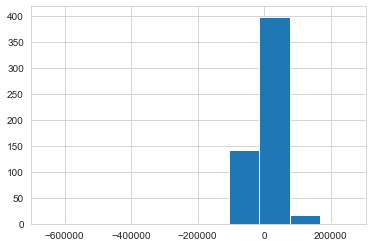

In [58]:
plt.hist(residuals, bins=10);
#violates normality assumption

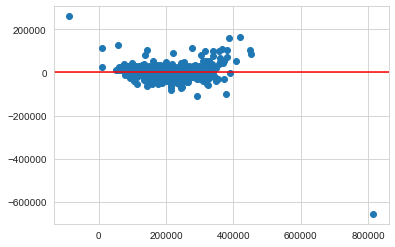

In [59]:
plt.scatter(test_preds,residuals)
plt.axhline(0,color = 'red');

Does not pass equal variance of errors assumption, also  note of the outlier in the lower right hand corner. Can be addressed in a future model with applying log.

### Multicollinearity/Independence of Predictors

In [60]:
X.corr()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
id,1.000000,0.180369,0.014740,0.031207,-0.060564,-0.025733,-0.047103,0.001512,0.017181,-0.033476,-0.041608,-0.022231,0.001898,-0.010776,-0.017040,-0.026972,0.005487,-0.058544,-0.040966,0.022496,0.009138,0.000879,-0.035734,-0.039759,-0.034274,-0.050282,0.002437,-0.000148,0.025179,-0.026459,0.012158,0.054716,-0.008072,0.130553,-0.059743,0.012774,-0.008147,0.044449,0.014484,-0.025732,0.007477,0.040744,-0.026152,0.038349,0.006120,-0.046593,-0.024556
pid,0.180369,1.000000,-0.035444,0.025691,-0.241517,0.124003,-0.069141,-0.006162,-0.096389,-0.180493,-0.196855,-0.140376,-0.007143,0.049724,-0.113319,-0.021700,-0.003780,-0.186165,-0.147725,-0.008552,0.043201,-0.099938,-0.101611,-0.182802,-0.150536,-0.207010,-0.021828,-0.078722,0.133573,-0.026086,-0.037812,-0.000151,0.004381,-0.032464,-0.213532,-0.002256,-0.224228,0.371342,0.027581,-0.112468,0.049013,0.088180,-0.101359,0.107388,0.020058,-0.212833,-0.083826
ms_subclass,0.014740,-0.035444,1.000000,-0.244072,0.067378,-0.106152,-0.057654,-0.070551,-0.144470,-0.244705,-0.035064,-0.248791,0.301522,0.011095,0.063845,0.025792,-0.014117,0.127755,0.208163,-0.059498,0.184107,-0.004941,-0.023023,0.016742,-0.060021,0.038854,0.008532,-0.008441,-0.055152,-0.029560,-0.030138,0.003501,-0.037008,0.012785,0.191568,0.078160,-0.322977,0.242386,0.008637,-0.446288,0.019829,0.039124,0.345456,0.152400,0.158425,-0.007378,0.027482
lot_area,0.031207,0.025691,-0.244072,1.000000,0.113728,-0.013980,0.225383,0.040836,0.051788,0.320813,0.038780,0.360159,0.032712,0.004625,0.315331,0.119933,0.033837,0.117208,0.046317,0.143110,-0.001119,0.234956,0.283117,0.202084,0.259520,-0.014496,0.151919,0.127587,0.011353,0.020850,0.066399,0.086016,0.098600,0.004284,-0.123662,-0.038023,0.265411,-0.215689,-0.033448,0.054254,0.047788,0.003185,-0.038174,-0.027608,0.006944,0.105213,0.230776
overall_qual,-0.060564,-0.241517,0.067378,0.113728,1.000000,-0.162414,0.240419,-0.055737,0.257223,0.514039,0.191895,0.497287,0.217071,-0.036565,0.580137,0.151347,-0.071263,0.547817,0.257855,0.033341,-0.101746,0.413279,0.359927,0.585067,0.546118,0.244714,0.243357,0.311746,-0.151767,0.029179,0.033758,0.020505,0.024075,0.012180,0.181913,-0.038942,0.109084,-0.201435,-0.023302,-0.045067,0.043233,0.028339,0.238599,-0.092450,-0.042828,0.735692,0.479936
overall_cond,-0.025733,0.124003,-0.106152,-0.013980,-0.162414,1.000000,-0.067799,0.043859,-0.152562,-0.217621,0.056055,-0.159483,-0.012863,0.020402,-0.136166,-0.057317,0.108808,-0.242982,-0.119496,-0.007937,-0.072383,-0.104721,-0.024270,-0.248130,-0.205747,-0.069491,-0.005368,-0.085881,0.123743,0.022063,0.041451,-0.004046,0.017105,0.012725,-0.124662,-0.036110,-0.051262,0.139861,0.085078,-0.060468,0.061486,0.086875,-0.071366,0.024605,0.030519,-0.195323,-0.145379
bsmtfin_sf_1,-0.047103,-0.069141,-0.057654,0.225383,0.240419,-0.067799,1.000000,-0.069196,-0.522595,0.529482,0.128848,0.480386,-0.182815,-0.069444,0.217774,0.631200,0.065876,0.068330,-0.028494,-0.130035,-0.027793,0.071530,0.280788,0.234752,0.320624,0.181224,0.197645,0.139998,-0.072766,0.048223,0.090132,0.088165,0.136439,-0.007291,-0.038431,0.018924,0.163655,-0.159376,-0.051857,0.212056,-0.033638,-0.060174,-0.145374,0.113818,-0.002421,0.263767,0.135188
bsmtfin_sf_2,0.001512,-0.006162,-0.070551,0.040836,-0.055737,0.043859,-0.069196,1.000000,-0.255824,0.063582,0.029795,0.092649,-0.095680,-0.008656,-0.009827,0.152407,0.097629,-0.084495,-0.020834,-0.042512,-0.0

Violates this as the garage cars and garage area features  have a high correlation of .854 but will still go forward for the predictive models.

### Checking for residuals!

In [61]:
#MSE on training
mean_squared_error(y_true=y_train, y_pred=train_preds)

815984934.7299068

In [62]:
#MSE for testing
mean_squared_error(y_true=y_test, y_pred=test_preds)

1783298891.138962

Training MSE is lower than testing MSE which is indicative of a a model not generalizing very well to "new" data.

In [63]:
#RMSE for training
mean_squared_error(y_true=y_train, y_pred=train_preds, squared=False)

28565.45001798338

In [64]:
#RMSE for testing
mean_squared_error(y_true=y_test, y_pred=test_preds, squared=False)

42229.12373160213

In [65]:
metrics.r2_score(y_train,train_preds)


0.8628372670650073

In [66]:
metrics.r2_score(y_test,test_preds)

0.7346371208606894

This model is slightly overfit as it does not generalize well to new data compared to how it does on the data it is trained on, as exhibited by the drop in score($R^2$) from .86 to .73. In other words this model can explain 86.28% of the variation in sales price for homes in Ames, Iowa but can only predict 73.46% of the variation in sales price when encountering new data.

In [67]:
print(1-(1-metrics.r2_score(y_test, test_preds)*(len(y_test-1)/(len(y_test)-len(features)-1))))
#3.02-lesson regression metrics(adjusted R2)

0.8035093509413791


As the more variables one adds,$R^2$ does not decrease. Here we calculate adjusted $R^2$ in order to account for the number of predictors in the model.  The fact that the score increases indcates that the variables are more useful in nature.

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/

Ultimately this first iteration of the model is not bad in terms of score but there is a need to seek more balance between bias and variance. This can be tackled with regularization which helps add a penalty to the loss function and avoids overfitting.

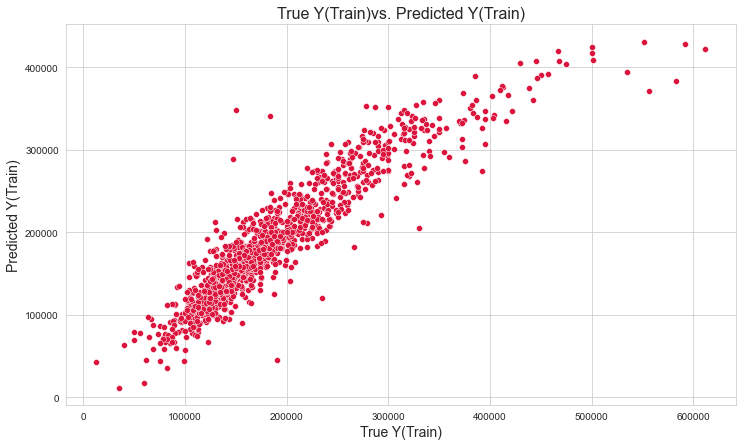

In [68]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg,x=y_train, y=train_preds, color='crimson');
plt.savefig('../images/1st_model_train.png')

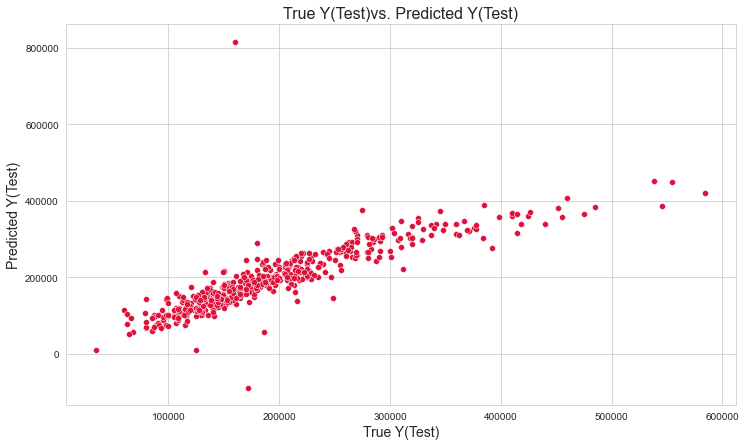

In [69]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg,x=y_test, y=test_preds, color='crimson');
plt.savefig('../images/1st_model_test.png')

A quick side to side visualization of the actual train and test versus the predicted.  We can see how the test version is slightly worse by the visual of more outliers.

## Model 2

### Regularization

In [70]:
sc=StandardScaler()
Z_train=sc.fit_transform(X_train)
Z_test=sc.transform(X_test)

In [71]:
linreg2=LinearRegression()
linreg2.fit(Z_train,y_train)


LinearRegression()

In [72]:
print(f'Training R-Squared: {linreg2.score(Z_train,y_train)}')
print(f'Testing R-Squared:{linreg2.score(Z_test,y_test)}')

Training R-Squared: 0.8628281014095329
Testing R-Squared:0.7357995844115373


In [73]:
r_alphas=np.logspace(0,5,100)

ridge_cv=RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_cv.fit(Z_train,y_train);

In [74]:
ridge_cv.alpha_

210.49041445120199

In [75]:
print(f'Ridge CV Training R-squared: {ridge_cv.score(Z_train,y_train)}')
print(f'Ridge CV Testing R-squared: {ridge_cv.score(Z_test, y_test)}')

Ridge CV Training R-squared: 0.8579740339194917
Ridge CV Testing R-squared: 0.7602483511557472


In [76]:
ridge_2=Ridge(alpha=ridge_cv.alpha_)
ridge_2.fit(Z_train, y_train)
print(f'Train score: {ridge_2.score(Z_train,y_train)}')
print(f'Test score: {ridge_2.score(Z_test, y_test)}')

Train score: 0.8579740339194917
Test score: 0.7602483511557472


Using Ridge we see a minimal difference between the original and the ridge version. Just that the training and test scores are a bit closer together. Original scores were 86.28%(training) and 73.46%(testing) compared to ridge scores of 85.80%(training) and 76.02%(testing).  We can see Ridge had a slightly worse performance with testing and slightly better with training, which also lowered the variance and made it slightly less overfit.  

This indicates a need for features that are more signal than noise, in order to strengthen the model's overall performance, increasing feature engineering that is guided by the research can help with this.

In [77]:
ridge_2_train_preds=ridge_2.predict(Z_train)
ridge_2_test_preds=ridge_2.predict(Z_test)


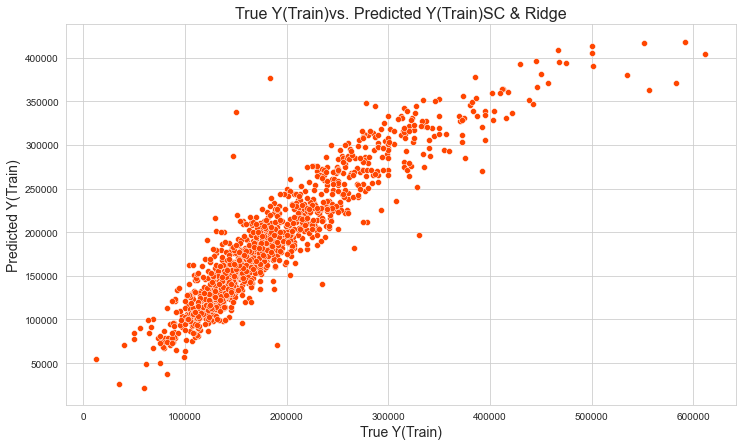

In [78]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)SC & Ridge',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= ridge_2,x=y_train, y=ridge_2_train_preds, color='orangered');
plt.savefig('../images/2nd_model_train.png')

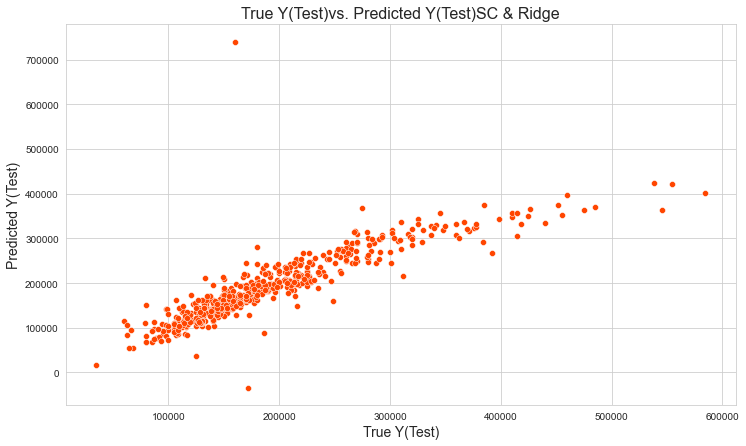

In [79]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)SC & Ridge',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= ridge_2,x=y_test, y=ridge_2_test_preds, color='orangered');
plt.savefig('../images/2nd_model_test.png')

## Kaggle submission

### Make same changes as done to the original training set for the corresponding model

In [80]:
kaggle_sub1=pd.read_csv('../datasets/test.csv')

In [81]:
kaggle_sub1.columns=[column.replace(' ','_').lower() for column in kaggle_sub1.columns]

In [82]:
kaggle_sub1.drop(columns=['pool_qc', 'misc_feature', 'alley','fence','fireplace_qu','lot_area','lot_frontage','mas_vnr_area','garage_yr_blt'], inplace=True)

In [83]:
kaggle_sub1.rename(columns={'year_remod/add':'year_remod_add'}, inplace=True)

In [84]:
kaggle_sub1[['year_built','year_remod_add','yr_sold']]=kaggle_sub1[['year_built','year_remod_add','yr_sold']].apply(pd.to_datetime,format='%Y')

In [85]:
kaggle_sub1['best_gr_liv_area']=(kaggle_sub1['gr_liv_area'] >= 1502).astype(int)

In [86]:
kaggle_sub1['high_qual']=(kaggle_sub1['overall_qual'] >= 8).astype(int)

In [87]:
kaggle_sub1=pd.get_dummies(columns=['ms_zoning'], data=kaggle_sub1, drop_first=True)

In [88]:
kaggle_sub1=pd.get_dummies(columns=['house_style'], data=kaggle_sub1, drop_first=True)

In [89]:
kaggle_sub1['paved_drive']=kaggle_sub1['paved_drive'].apply(lambda x:1 if x=='Y' else 0)

In [90]:
kaggle_sub1['central_air']=kaggle_sub1['central_air'].apply(lambda x:1 if x=='Y' else 0)

In [91]:
pd.set_option('display.max_rows', 800)

In [92]:
kaggle_sub1.isnull().sum()

id                     0
pid                    0
ms_subclass            0
street                 0
lot_shape              0
land_contour           0
utilities              0
lot_config             0
land_slope             0
neighborhood           0
condition_1            0
condition_2            0
bldg_type              0
overall_qual           0
overall_cond           0
year_built             0
year_remod_add         0
roof_style             0
roof_matl              0
exterior_1st           0
exterior_2nd           0
mas_vnr_type           1
exter_qual             0
exter_cond             0
foundation             0
bsmt_qual             25
bsmt_cond             25
bsmt_exposure         25
bsmtfin_type_1        25
bsmtfin_sf_1           0
bsmtfin_type_2        25
bsmtfin_sf_2           0
bsmt_unf_sf            0
total_bsmt_sf          0
heating                0
heating_qc             0
central_air            0
electrical             1
1st_flr_sf             0
2nd_flr_sf             0


In [93]:
kaggle_sub1['best_gr_liv_area'].value_counts()

0    492
1    386
Name: best_gr_liv_area, dtype: int64

In [94]:
features2=[col for col in kaggle_sub1._get_numeric_data().columns if col != 'saleprice']

In [95]:
kaggle_sub1[features2].shape

(878, 47)

### Create the predictions

In [96]:
kaggle_preds=linreg.predict(kaggle_sub1[features2])

In [97]:
kaggle_sub1['saleprice']=kaggle_preds

In [98]:
kaggle_sub1[['id','saleprice']]

,id,saleprice
0,2658,7.242669e+06
1,2718,1.508834e+07
2,2414,8.471047e+06
3,1989,7.872011e+06
4,625,1.328950e+07
...,...,...
873,1662,1.256346e+07
874,1234,1.112157e+07
875,1373,9.854557e+06
876,1672,1.005105e+07


### Export Kaggle submission as a CSV

In [99]:
kaggle_sub1[['id','saleprice']].to_csv('../datasets/kaggle_sub1_dc.csv', index=False)

In [100]:
pd.DataFrame(list(zip(features2,linreg.coef_)), columns=['Feature',"Coefficient"]).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
45,house_style_SFoyer,33305.358905
34,high_qual,19004.608502
43,house_style_2.5Unf,18150.472038
38,ms_zoning_RL,16503.958321
4,overall_cond,14441.937706
44,house_style_2Story,14178.340199
35,ms_zoning_FV,12176.905547
36,ms_zoning_I (all),10299.133474
39,ms_zoning_RM,7767.013239
17,half_bath,7182.047051


## Second kaggle submission using linear model that has been scaled and regularized

In [101]:
kaggle_sub2=pd.read_csv('../datasets/test.csv')

In [102]:
kaggle_sub2.columns=[column.replace(' ','_').lower() for column in kaggle_sub2.columns]

In [103]:
kaggle_sub2.drop(columns=['pool_qc', 'misc_feature', 'alley','fence','fireplace_qu','lot_area','lot_frontage','mas_vnr_area','garage_yr_blt'], inplace=True)

In [104]:
kaggle_sub2.rename(columns={'year_remod/add':'year_remod_add'}, inplace=True)

In [105]:
kaggle_sub2[['year_built','year_remod_add','yr_sold']]=kaggle_sub2[['year_built','year_remod_add','yr_sold']].apply(pd.to_datetime,format='%Y')

In [106]:
kaggle_sub2['best_gr_liv_area']=(kaggle_sub2['gr_liv_area'] >= 1502).astype(int)

In [107]:
kaggle_sub2['high_qual']=(kaggle_sub2['overall_qual'] >= 8).astype(int)

In [108]:
kaggle_sub2=pd.get_dummies(columns=['ms_zoning'], data=kaggle_sub2, drop_first=True)

In [109]:
kaggle_sub2=pd.get_dummies(columns=['house_style'], data=kaggle_sub2, drop_first=True)

In [110]:
kaggle_sub2['paved_drive']=kaggle_sub2['paved_drive'].apply(lambda x:1 if x=='Y' else 0)

In [111]:
kaggle_sub2['central_air']=kaggle_sub2['central_air'].apply(lambda x:1 if x=='Y' else 0)

In [112]:
features3=[col for col in kaggle_sub2._get_numeric_data().columns if col != 'saleprice']
kaggle_2_sc=sc.transform(kaggle_sub2[features3])

In [113]:
kaggle_preds2=ridge_cv.predict(kaggle_2_sc)

In [114]:
kaggle_sub2['saleprice']=kaggle_preds2

In [115]:
kaggle_sub2[['id','saleprice']].to_csv('../datasets/kaggle_sub2_dc.csv', index=False)

In [116]:
pd.DataFrame(list(zip(features3,ridge_cv.coef_)), columns=['Feature',"Coefficient"]).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
4,overall_cond,16335.013525
45,house_style_SFoyer,12575.413315
9,central_air,9867.300705
14,bsmt_full_bath,8826.409608
6,bsmtfin_sf_2,8394.615685
21,fireplaces,6320.526691
11,2nd_flr_sf,5721.780877
24,paved_drive,5534.728701
12,low_qual_fin_sf,4760.068812
23,garage_area,4539.413019
